In [20]:
import pandas as pd
import seaborn as sns

In [21]:
def convert_data_frame(data):
    data_dict = {}
    for index, row in data.iterrows():
        now_index = row["num_vertices"], row["num_edges"]
        if now_index not in data_dict:
            data_dict[now_index] = []
        data_dict[now_index].append(row["time"])
    average_list = []
    for key, value in data_dict.items():
        average_list.append(
            {
                "num_vertices": key[0],
                "num_edges": key[1],
                "rate": key[1] / (key[0] * key[0]),
                "average": sum(value) / len(value),
            }
        )
    average_data = pd.DataFrame.from_dict(average_list, orient="columns")
    return average_data

In [22]:
matrix_data = pd.read_csv("./time_diff_edge_matrix.csv")
matrix_data = convert_data_frame(matrix_data)
matrix_data.head()

,num_vertices,num_edges,rate,average
0,1000,10000,0.01,9.828466e+06
1,1000,20000,0.02,1.047933e+07
2,1000,30000,0.03,1.048963e+07
3,1000,40000,0.04,1.117957e+07
4,1000,50000,0.05,1.110726e+07


In [23]:
list_data = pd.read_csv("./time_diff_edge_list.csv")
list_data = convert_data_frame(list_data)
list_data.head()

,num_vertices,num_edges,rate,average
0,1000,10000,0.01,948971.0
1,1000,20000,0.02,1558224.0
2,1000,30000,0.03,2675211.0
3,1000,40000,0.04,3200793.0
4,1000,50000,0.05,4133203.0


Text(0, 0.5, 'time (μs)')

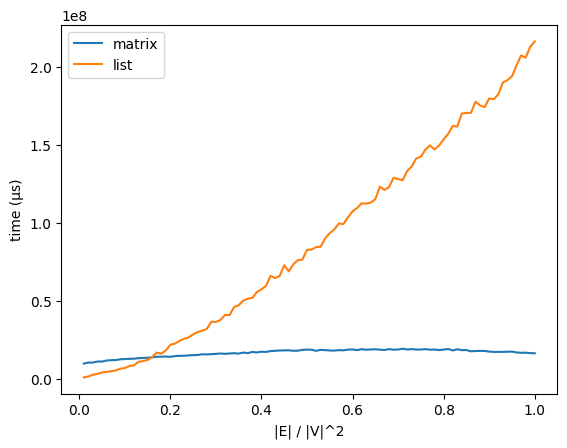

In [24]:
import matplotlib.pyplot as plt

sns.lineplot(x="rate", y="average", data=matrix_data, label="matrix")
sns.lineplot(x="rate", y="average", data=list_data, label="list")
plt.xlabel("|E| / |V|^2")
plt.ylabel("time (μs)")